In [148]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from tparbressource import *
import matplotlib.pyplot as plt
import seaborn as sns

2) Simulate with rand_checkers a sample of size n = 456 (be careful to keep balanced classes). Display
2 charts that indicate the percentage of errors as a function of the maximal depth of the tree (one
for Gini and one for the entropy). Keep the default values for the other parameters.

In [149]:
# Generate data
def generateBalancedClassesData(n):
    cl=int(n/4)
    data = rand_checkers(n1=cl, n2=cl, n3=cl, n4=cl)
    return data

data = generateBalancedClassesData(456)
# No need for test / train splitting, for now we are only going to train
X = data[:,:2]
y = data[:,-1]

In [150]:
def testTreesByDepth(X, y, max_depth=10, criterion='gini', cv=1):
    # Initialize results
    res = []
    clf_l = []
    
    for i in range(1,max_depth+1):
        # Create classifier
        clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
        # Store them for future use 
        clf_l.append(clf)
        # Train classifier
        clf.fit(X, y)
        # Computing accuracy score on the same data as train data will give the percentage 
        # of errors on train data. Obviously error % is 1 - accuracy
        # For cross validation, returns average value of scores obtained with different folds
        if cv > 1:
            score = np.average(cross_val_score(clf, X, y, cv=cv))
        else:
            score = clf.score(X, y)
        err = (1 - score)
        res.append(err)
        
    return res, clf_l

def minErrorDepth(errors):
    return errors.index(min(errors)) + 1

depth=25
res_g, clf_g_l = testTreesByDepth(X, y, max_depth=depth, criterion='gini')
res_e, clf_e_l = testTreesByDepth(X, y, max_depth=depth, criterion='entropy')

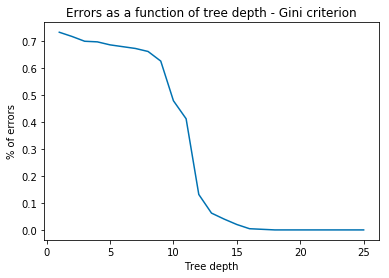

In [151]:
# Line plot instead of scatter was preferred
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Gini criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, depth+1), np.array(res_g))

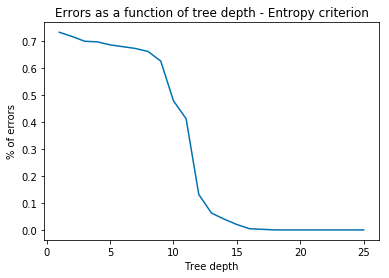

In [152]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, depth+1), np.array(res_e))

3) Display the classifier obtained using the depth that minimizes the error percentage with the entropy
(you can use the functions plot_2d and frontiere from the source file).

In [153]:
# Depth minimizing error
depth_minerr = minErrorDepth(res_e)
print("Three depth minimizing error: " + str(depth_minerr))

Three depth minimizing error: 18


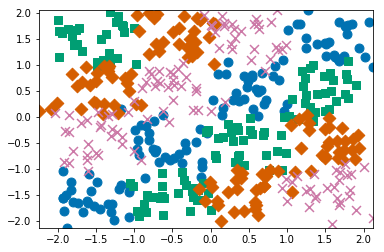

In [154]:
clf_minerr = DecisionTreeClassifier(criterion='entropy', max_depth=depth_minerr)
clf_minerr.fit(X, y)
y=clf_minerr.predict(X)
plot_2d(X, y)

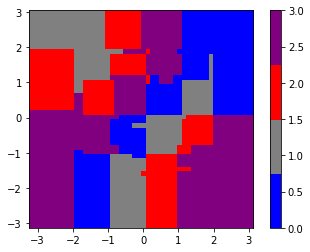

In [155]:
frontiere(clf_minerr.predict, X)
plt.show()

In [156]:
d = np.hstack((X, y[:, np.newaxis]))

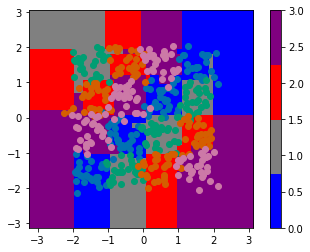

In [157]:
# Superimposing decision regions and classified data
color_blind_list = sns.color_palette("colorblind", 4)

plt.figure()
frontiere(clf_minerr.predict, X)
for i in range(4):
    plt.scatter(d[d[:,2]==i, 0], d[d[:,2] == i, 1], c=color_blind_list[i])
plt.show()

4) Export a figure of the tree obtained at the previous question in the pdf format. We can for example
call the export_graphviz function from the module tree.

In [158]:
# We can just export a dot file, pdf conversion will be performed outside
out_file = open("./tree_description.dot", 'w')
tree.export_graphviz(clf_minerr, out_file=out_file)
out_file.close()

5) Create n = 160 new samples with rand_checkers. For the decision trees obtained in question 2,
compute the proportion of errors on this second sample. Comment.

In [159]:
# Generate new data
data2 = generateBalancedClassesData(160)
X2 = data2[:,:2]
y2 = data2[:,-1]

# Initialize results
res_g2 = []
res_e2 = []

for i in range(0, depth):
    clf_e = clf_e_l[i]
    clf_g = clf_g_l[i]
    err_g = (1 - clf_g.score(X2, y2))
    err_e = (1 - clf_e.score(X2, y2))
    res_g2.append(err_g)
    res_e2.append(err_e)

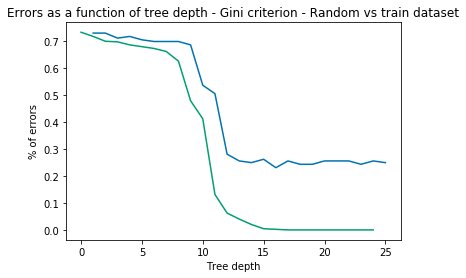

In [160]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Gini criterion - Random vs train dataset')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, depth+1), np.array(res_g2), np.array(res_g))

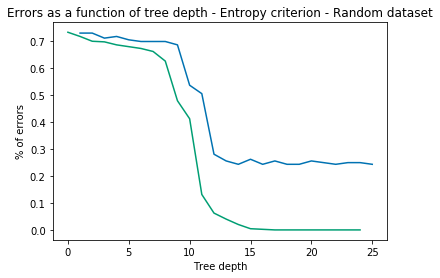

In [161]:
# Line plot instead of scatter was preferred
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion - Random dataset')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, depth+1), np.array(res_e2), np.array(res_e))

As expected, the error percentage is higher than the one obtained on train data. 
Both plots clearly show that with a three depth greater than 12 trees are not able to perform better with increasing depth. This means that above that depth value trees become overfitted and are hence unable to generalize about new data.

6) Do the question 2 again for the dataset zipcode. It is available in the module sklearn.datasets.
One can import it with the function load_digits (for more details see http://scikit-learn.
org/stable/auto_examples/classification/plot_digits_classification.htm

In [162]:
digits = datasets.load_digits()

In [163]:
res_g, clf_g = testTreesByDepth(digits.data, digits.target, max_depth=25, criterion='gini')
res_e, clf_e = testTreesByDepth(digits.data, digits.target, max_depth=25, criterion='entropy')

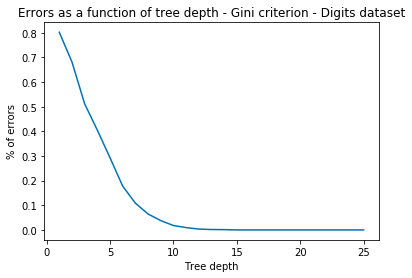

In [164]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Gini criterion - Digits dataset')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, depth+1), np.array(res_g))

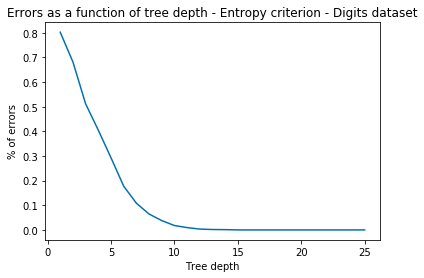

In [165]:
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion - Digits dataset')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, depth+1), np.array(res_g))

In [166]:
# Depth minimizing error
print("Three depth minimizing error: " + str(minErrorDepth(res_e)))

Three depth minimizing error: 15


7) Use the function sklearn.cross_validation.cross_val_score and test it on the dataset zip-
code by varying the depth of the decision tree. You can reuse this function to choose the optimal
depth of the tree.

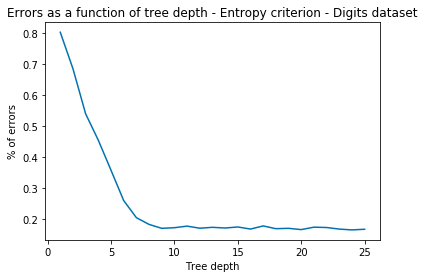

In [167]:
res_g10, clf_g10 = testTreesByDepth(digits.data, digits.target, max_depth=25, criterion='entropy', cv=10)
fig, ax = plt.subplots()
ax.set_title('Errors as a function of tree depth - Entropy criterion - Digits dataset')
ax.set_xlabel('Tree depth')
ax.set_ylabel('% of errors')
plt.plot(range(1, depth+1), np.array(res_g10))

In [168]:
# Depth minimizing error, with cross validation
depth_min_cv = minErrorDepth(res_g10)
print("Three depth minimizing error: " + str(depth_min_cv))

Three depth minimizing error: 24


8) Inspire yourself from http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html to plot the learning curve (en : learning curve) for decision trees on the same dataset.

<module 'matplotlib.pyplot' from '/home/pietro/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

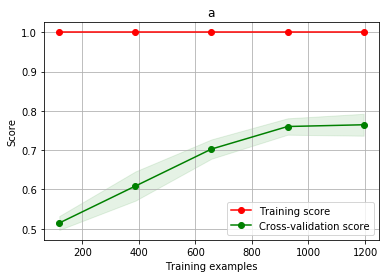

In [169]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

clf = DecisionTreeClassifier(max_depth=depth_min_cv)
plot_learning_curve(clf, 'a', digits.data, digits.target)